# Exercises of capter 3

## 3.5 Exercises

1. Calcule |V| e |E| para o grafo na Figura 3.1(c).

Se considerarmos cada vértice e aresta como a seguir:
    B  
  /   \  
A       D - E  
  \   /  
    C 
$$ \therefore |V| = 5 $$
$$ \therefore |E| = 5 $$

2. O Sr. A considera a Sra. B uma amiga, mas ela não gosta dele de volta. Ela tem uma amizade recíproca com C e D, mas apenas C considera D um amigo. D também enviou solicitações de amizade para E, F, G e H, mas, até agora, apenas G respondeu. G também tem um relacionamento recíproco com A. Desenhe o grafo dirigido correspondente.

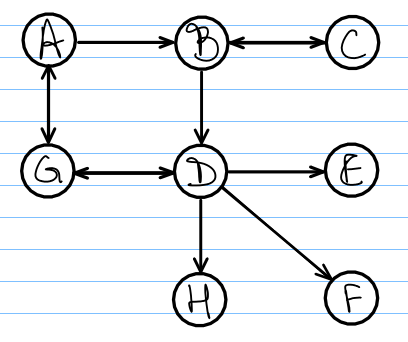

3. Desenhe o grafo anterior como não dirigido e ponderado, com o peso sendo 2 se a conexão for recíproca e 1 caso contrário.

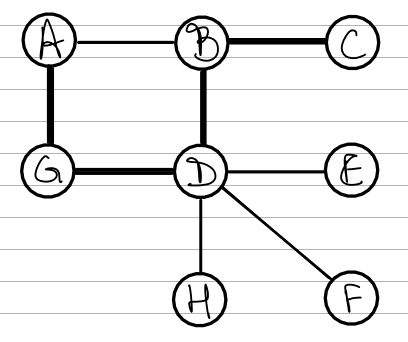

4. Desenhe uma rede de correlação para os vetores em http://www.networkatlas.eu/exercises/3/4/data.txt, desenhando apenas arestas com pesos positivos e ignorando auto-laços.

| A | B | C | D | E | F | G | H |
| - | - | - | - | - | - | - | - |
| 1	| 6 | 1	| 1	| 1	| 3	| 1	| 1 |
| 1	| 4 | 4	| 6	| 1	| 5	| 3	| 7 |
| 1 | 4 | 4	| 6	| 1	| 5	| 7	| 8 |
| 1	| 4	| 6	| 8	| 1	| 7	| 8	| 4 |
| 1	| 5	| 7	| 7	| 2	| 0	| 0	| 5 |
| 2	| 2	| 5	| 7	| 2	| 9	| 9	| 5 |
| 3	| 6	| 7	| 0	| 3	| 7	| 6	| 4 |
| 4	| 6	| 9	| 5	| 3	| 3	| 3	| 7 |
| 4	| 4	| 8	| 4	| 4	| 2	| 3	| 5 |
| 3	| 6	| 7	| 3	| 5	| 0	| 3	| 5 |
| 5	| 4	| 7	| 2	| 5	| 8	| 7	| 5 |
| 6	| 6	| 9	| 4	| 6	| 8	| 7	| 4 |
| 7	| 4	| 7	| 5	| 7	| 4	| 5	| 7 |
| 8	| 6	| 0	| 2	| 7	| 2	| 4	| 3 |
| 9	| 7	| 3	| 9	| 8	| 3	| 5	| 6 |

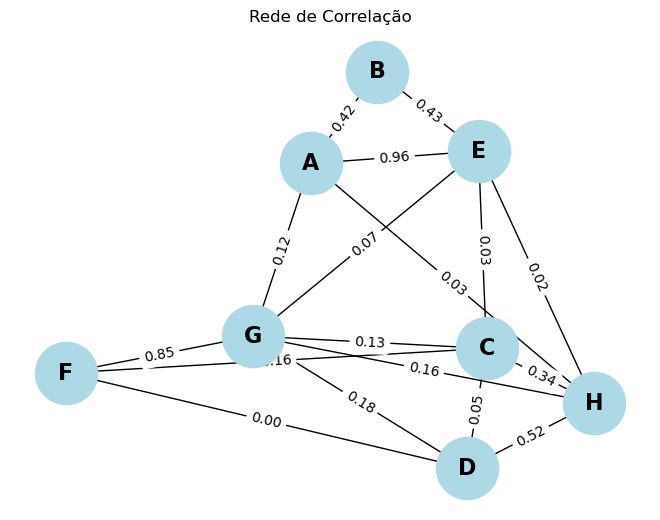

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
import networkx as nx

# 1o: carregar os dados em uma matriz
data = np.array([
    [1, 6, 1, 1, 1, 3, 1, 1],
    [1, 4, 4, 6, 1, 5, 3, 7],
    [1, 4, 4, 6, 1, 5, 7, 8],
    [1, 4, 6, 8, 1, 7, 8, 4],
    [1, 5, 7, 7, 2, 0, 0, 5],
    [2, 2, 5, 7, 2, 9, 9, 5],
    [3, 6, 7, 0, 3, 7, 6, 4],
    [4, 6, 9, 5, 3, 3, 3, 7],
    [4, 4, 8, 4, 4, 2, 3, 5],
    [3, 6, 7, 3, 5, 0, 3, 5],
    [5, 4, 7, 2, 5, 8, 7, 5],
    [6, 6, 9, 4, 6, 8, 7, 4],
    [7, 4, 7, 5, 7, 4, 5, 7],
    [8, 6, 0, 2, 7, 2, 4, 3],
    [9, 7, 3, 9, 8, 3, 5, 6]
])

# 2o: carregar a matriz de correlação
correlation_matrix = np.corrcoef(data, rowvar=False)

# 3o: filtrar arestas
# Criar grafo dirigido
G = nx.Graph()

# Adicionar arestas com pesos positivos
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
for i in range(len(labels)):
    for j in range(i):
        if correlation_matrix[i, j] > 0:  # Apenas pesos positivos
            G.add_edge(labels[i], labels[j], weight=correlation_matrix[i, j])

# Desenhar o grafo
pos = nx.spring_layout(G)  # Posição dos nós
weights = nx.get_edge_attributes(G, 'weight').values()
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)})

plt.title('Rede de Correlação')
plt.show()